In [24]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
print(X_train_full.shape)
print(X_train_full.dtype)


(60000, 28, 28)
uint8


In [4]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [5]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

class_names[y_train[0]]

'Coat'

# Creating a Model using Keras API

In [61]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [62]:
from keras.layers import Dense
output_layer = Dense(10)
output_layer

In [63]:
from tensorflow.keras.layers import Dense
output_layer = Dense(10)
output_layer

In [64]:
from tensorflow import keras
output_layer = keras.layers.Dense(10)
output_layer

In [6]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [7]:
print(model.layers)
hidden1 = model.layers[1]
hidden1.name

[<tensorflow.python.keras.layers.core.Flatten object at 0x7f91b096edd0>, <tensorflow.python.keras.layers.core.Dense object at 0x7f91a945e110>, <tensorflow.python.keras.layers.core.Dense object at 0x7f919141b750>, <tensorflow.python.keras.layers.core.Dense object at 0x7f91899103d0>]


'dense'

In [8]:
weights, biases = hidden1.get_weights()
weights.shape

(784, 300)

In [10]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5002 - accuracy: 0.8285 - val_loss: 0.4393 - val_accuracy: 0.8476
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4468 - accuracy: 0.8424 - val_loss: 0.4156 - val_accuracy: 0.8600
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4171 - accuracy: 0.8534 - val_loss: 0.3995 - val_accuracy: 0.8620
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3937 - accuracy: 0.8636 - val_loss: 0.3967 - val_accuracy: 0.8660
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3777 - accuracy: 0.8674 - val_loss: 0.3664 - val_accuracy: 0.8738
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3627 - accuracy: 0.8743 - val_loss: 0.3574 - val_accuracy: 0.8750
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3508 - accuracy: 0.8772 - val_loss: 0.3657 - val_accuracy:

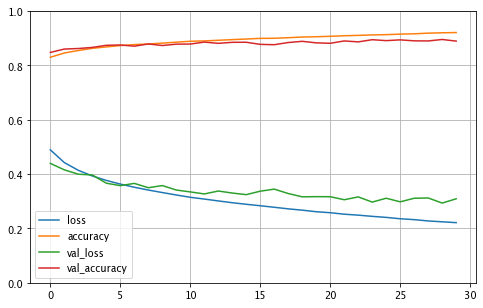

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [12]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3389 - accuracy: 0.8792


[0.33893123269081116, 0.8791999816894531]

In [19]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.sum(axis=1)

array([1.0000001 , 0.99999994, 1.0000001 ], dtype=float32)

In [25]:
y_pred = model.predict_classes(X_new)
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

# Building a Regression MLP Using the Sequential API

In [26]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [29]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)    
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train,
    y_train,
    epochs=20,
    validation_data=(X_valid, y_valid)
)
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)


Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 4.8126 - val_loss: 0.4737
Epoch 2/20
363/363 [==============================] - 0s 775us/step - loss: 0.4319 - val_loss: 1.1660
Epoch 3/20
363/363 [==============================] - 0s 807us/step - loss: 3.3978 - val_loss: 0.3973
Epoch 4/20
363/363 [==============================] - 0s 730us/step - loss: 0.3731 - val_loss: 0.3711
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3608 - val_loss: 0.3667
Epoch 6/20
363/363 [==============================] - 0s 865us/step - loss: 0.3448 - val_loss: 0.3610
Epoch 7/20
363/363 [==============================] - 0s 786us/step - loss: 0.3446 - val_loss: 0.3606
Epoch 8/20
363/363 [==============================] - 0s 788us/step - loss: 0.3400 - val_loss: 0.3649
Epoch 9/20
363/363 [==============================] - 0s 827us/step - loss: 0.3460 - val_loss: 0.3515
Epoch 10/20
363/363 [==============================] - 0s 843us/step - loss: 0.3388 - 

In [32]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden1])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])


In [33]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [34]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 3.7630 - val_loss: 0.8946
Epoch 2/20
363/363 [==============================] - 0s 842us/step - loss: 0.8146 - val_loss: 0.6490
Epoch 3/20
363/363 [==============================] - 0s 820us/step - loss: 0.6336 - val_loss: 0.5812
Epoch 4/20
363/363 [==============================] - 0s 971us/step - loss: 0.6007 - val_loss: 0.5444
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5405 - val_loss: 0.5205
Epoch 6/20
363/363 [==============================] - 0s 849us/step - loss: 0.5217 - val_loss: 0.4993
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5037 - val_loss: 0.4862
Epoch 8/20
363/363 [==============================] - 0s 778us/step - loss: 0.4946 - val_loss: 0.4758
Epoch 9/20
363/363 [==============================] - 0s 754us/step - loss: 0.4853 - val_loss: 0.4724
Epoch 10/20
363/363 [==============================] - 0s 792us/step - loss: 0.5039 - va

In [35]:
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [36]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [37]:
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.2865 - main_output_loss: 1.1318 - aux_output_loss: 2.6789 - val_loss: 0.4990 - val_main_output_loss: 0.4514 - val_aux_output_loss: 0.9277
Epoch 2/20
363/363 [==============================] - 0s 982us/step - loss: 0.5442 - main_output_loss: 0.5038 - aux_output_loss: 0.9074 - val_loss: 0.4628 - val_main_output_loss: 0.4289 - val_aux_output_loss: 0.7672
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5389 - main_output_loss: 0.5145 - aux_output_loss: 0.7588 - val_loss: 0.4482 - val_main_output_loss: 0.4201 - val_aux_output_loss: 0.7008
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4609 - main_output_loss: 0.4344 - aux_output_loss: 0.7002 - val_loss: 0.4340 - val_main_output_loss: 0.4094 - val_aux_output_loss: 0.6554
Epoch 5/20
363/363 [==============================] - 0s 921us/step - loss: 0.4245 - main_output_loss: 0.4010 - aux_output_loss: 0.6367 - val_

In [38]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 674us/step - loss: 0.3773 - main_output_loss: 0.3675 - aux_output_loss: 0.4654


# Using subclassing API to build Dynamic models

In [40]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        inputs_A, inputs_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.Concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()

# Saving Keras models

In [42]:
# model = keras.models.Sequential([...]) # or keras.Model([...])
# model.compile([...])
# model.fit([...])
# model.save("my_keras_model.h5")

In [44]:
# model = keras.models.load_model("my_keras_model.h5")

In [46]:
# checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
# history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

## custom callbacks

In [47]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [48]:
%load_ext tensorboard

# Fine-tune Neural Networks Hyperparameters

In [52]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [53]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 2.1329 - val_loss: 0.6313
Epoch 2/100
363/363 [==============================] - 0s 806us/step - loss: 0.6531 - val_loss: 0.5705
Epoch 3/100
363/363 [==============================] - 0s 807us/step - loss: 0.6271 - val_loss: 0.5027
Epoch 4/100
363/363 [==============================] - 0s 787us/step - loss: 0.5144 - val_loss: 0.4801
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4745 - val_loss: 0.4640
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4763 - val_loss: 0.4530
Epoch 7/100
363/363 [==============================] - 0s 829us/step - loss: 0.4654 - val_loss: 0.4471
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4398 - val_loss: 0.4373
Epoch 9/100
363/363 [==============================] - 0s 863us/step - loss: 0.4551 - val_loss: 0.4302
Epoch 10/100
363/363 [==============================] - 0s 883us/step - loss: 0.4

363/363 [==============================] - 0s 860us/step - loss: 0.3520 - val_loss: 0.3481
Epoch 81/100
363/363 [==============================] - 0s 752us/step - loss: 0.3441 - val_loss: 0.3484
Epoch 82/100
363/363 [==============================] - 0s 883us/step - loss: 0.3466 - val_loss: 0.3495
Epoch 83/100
363/363 [==============================] - 0s 767us/step - loss: 0.3356 - val_loss: 0.3495
Epoch 84/100
363/363 [==============================] - 0s 758us/step - loss: 0.3546 - val_loss: 0.3496
Epoch 85/100
363/363 [==============================] - 0s 785us/step - loss: 0.3723 - val_loss: 0.3494
Epoch 86/100
363/363 [==============================] - 0s 751us/step - loss: 0.3542 - val_loss: 0.3485
Epoch 87/100
363/363 [==============================] - 0s 781us/step - loss: 0.3331 - val_loss: 0.3475
Epoch 88/100
363/363 [==============================] - 0s 771us/step - loss: 0.3429 - val_loss: 0.3471
Epoch 89/100
363/363 [==============================] - 0s 844us/step - loss:

In [56]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0,1,2,3],
    "n_neurons": np.arange(1,100),
    "learning_rate": reciprocal(3e-4, 3e-2)
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 5.0536 - val_loss: 2.8956
Epoch 2/100
242/242 [==============================] - 0s 959us/step - loss: 2.7608 - val_loss: 1.8056
Epoch 3/100
242/242 [==============================] - 0s 980us/step - loss: 1.6614 - val_loss: 1.2923
Epoch 4/100
242/242 [==============================] - 0s 946us/step - loss: 1.2164 - val_loss: 0.9854
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.9443 - val_loss: 0.8154
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7776 - val_loss: 0.7208
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7223 - val_loss: 0.6684
Epoch 8/100
242/242 [==============================] - 0s 951us/step - loss: 0.6480 - val_loss: 0.6392
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6386 - val_loss: 0.6208
Epoch 10/100
242/242 [==============================] - 0s 867us/step - loss: 0.622

Epoch 80/100
242/242 [==============================] - 0s 804us/step - loss: 0.4147 - val_loss: 0.4209
Epoch 81/100
242/242 [==============================] - 0s 777us/step - loss: 0.4023 - val_loss: 0.4202
Epoch 82/100
242/242 [==============================] - 0s 754us/step - loss: 0.4228 - val_loss: 0.4195
Epoch 83/100
242/242 [==============================] - 0s 757us/step - loss: 0.4095 - val_loss: 0.4191
Epoch 84/100
242/242 [==============================] - 0s 770us/step - loss: 0.4011 - val_loss: 0.4183
Epoch 85/100
242/242 [==============================] - 0s 784us/step - loss: 0.4123 - val_loss: 0.4174
Epoch 86/100
242/242 [==============================] - 0s 768us/step - loss: 0.4026 - val_loss: 0.4171
Epoch 87/100
242/242 [==============================] - 0s 768us/step - loss: 0.3976 - val_loss: 0.4165
Epoch 88/100
242/242 [==============================] - 0s 764us/step - loss: 0.4038 - val_loss: 0.4160
Epoch 89/100
242/242 [==============================] - 0s 758us

242/242 [==============================] - 0s 931us/step - loss: 0.5111 - val_loss: 0.4697
Epoch 59/100
242/242 [==============================] - 0s 809us/step - loss: 0.4967 - val_loss: 0.4682
Epoch 60/100
242/242 [==============================] - 0s 850us/step - loss: 0.4898 - val_loss: 0.4667
Epoch 61/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5085 - val_loss: 0.4651
Epoch 62/100
242/242 [==============================] - 0s 843us/step - loss: 0.5010 - val_loss: 0.4637
Epoch 63/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4858 - val_loss: 0.4622
Epoch 64/100
242/242 [==============================] - 0s 912us/step - loss: 0.4973 - val_loss: 0.4607
Epoch 65/100
242/242 [==============================] - 0s 881us/step - loss: 0.4654 - val_loss: 0.4594
Epoch 66/100
242/242 [==============================] - 0s 819us/step - loss: 0.4485 - val_loss: 0.4581
Epoch 67/100
242/242 [==============================] - 0s 843us/step - loss: 0.4

KeyboardInterrupt: 

In [60]:
# rnd_search_cv.best_params_
# {'learning_rate': 0.0033625641252688094, 'n_hidden': 2, 'n_neurons': 42}
# rnd_search_cv.best_score_
# model = rnd_search_cv.best_estimator_.model